
* DATA: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/notebooks





In [3]:
import findspark 
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[4]').appName('dfgiris') \
.config('spark.driver.memory','2g')\
.config('spark.executor.memory','2g').getOrCreate()

sc = spark.sparkContext

## Train Data Set

In [4]:
data_train = spark.read\
.option('sep',',')\
.option('header','True')\
.option('inferSchema','True')\
.csv('train.csv')

data_train.show(3)

+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
|enrollee_id|    city|city_development_index|gender| relevent_experience|enrolled_university|education_level|major_discipline|experience|company_size|company_type|last_new_job|training_hours|target|
+-----------+--------+----------------------+------+--------------------+-------------------+---------------+----------------+----------+------------+------------+------------+--------------+------+
|       8949|city_103|                  0.92|  Male|Has relevent expe...|      no_enrollment|       Graduate|            STEM|       >20|        null|        null|           1|            36|   1.0|
|      29725| city_40|    0.7759999999999999|  Male|No relevent exper...|      no_enrollment|       Graduate|            STEM|        15|       50-99|     Pvt Ltd|          >4|            47|   0.0|
|    

In [5]:
data_train.columns

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [6]:
data_train.printSchema()

root
 |-- enrollee_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- city_development_index: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- company_type: string (nullable = true)
 |-- last_new_job: string (nullable = true)
 |-- training_hours: integer (nullable = true)
 |-- target: double (nullable = true)



## Test Data Set

In [7]:
data_test = spark.read\
.option('sep',',')\
.option('header','True')\
.option('inferSchema','True')\
.csv('test.csv')

data_test.toPandas().head(-3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,None,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,None,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,None,<1,None,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,27163,city_173,0.878,Male,No relevent experience,no_enrollment,Masters,STEM,16,<10,Pvt Ltd,>4,58
2122,24507,city_90,0.698,None,No relevent experience,no_enrollment,Graduate,STEM,20,None,None,never,133
2123,21339,city_21,0.624,Female,No relevent experience,Full time course,High School,None,3,None,None,never,56
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,None,Public Sector,4,15


In [8]:
data_test.columns

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours']

In [9]:
data_test.printSchema()

root
 |-- enrollee_id: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- city_development_index: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- relevent_experience: string (nullable = true)
 |-- enrolled_university: string (nullable = true)
 |-- education_level: string (nullable = true)
 |-- major_discipline: string (nullable = true)
 |-- experience: string (nullable = true)
 |-- company_size: string (nullable = true)
 |-- company_type: string (nullable = true)
 |-- last_new_job: string (nullable = true)
 |-- training_hours: integer (nullable = true)



# Descriptive Statistics

In [10]:
data_test.select('experience','training_hours','company_type','company_size','major_discipline','education_level').describe().show()

+-------+-----------------+------------------+-------------------+------------+----------------+---------------+
|summary|       experience|    training_hours|       company_type|company_size|major_discipline|education_level|
+-------+-----------------+------------------+-------------------+------------+----------------+---------------+
|  count|             2124|              2129|               1495|        1507|            1817|           2077|
|   mean|8.050389922015597| 64.98309065288868|               null|        null|            null|           null|
| stddev|4.903496513627199|60.238659866493016|               null|        null|            null|           null|
|    min|                1|                 1|Early Stage Startup|       10/49|            Arts|       Graduate|
|    max|              >20|               334|            Pvt Ltd|         <10|            STEM| Primary School|
+-------+-----------------+------------------+-------------------+------------+----------------+

In [11]:
data_train.select('experience','training_hours','company_type','company_size','major_discipline','education_level','gender').describe().toPandas()

,summary,experience,training_hours,company_type,company_size,major_discipline,education_level,gender
0,count,19093,19158,13018,13220,16345,18698,14650
1,mean,8.101799149492967,65.36689633573442,None,None,None,None,None
2,stddev,4.934599764055633,60.05846192467765,None,None,None,None,None
3,min,1,1,Early Stage Startup,10/49,Arts,Graduate,Female
4,max,>20,336,Pvt Ltd,<10,STEM,Primary School,Other


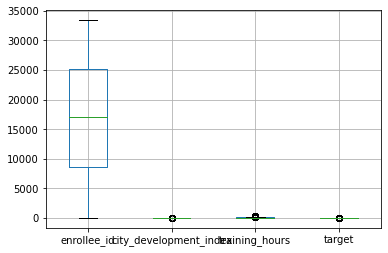

In [16]:
from matplotlib import pyplot as plt
import pandas as pd

data_train.toPandas().boxplot();

## Detect Nan Value & Filling

In [10]:
# Train data missing values
for i in data_train.columns:
    ms = data_train.filter(data_train[i].isNull()).count()
    ct = data_train.count()
    print(i,'\tHave %',ms/ct*100," Nan value") 

enrollee_id 	Have % 0.0  Nan value
city 	Have % 0.0  Nan value
city_development_index 	Have % 0.0  Nan value
gender 	Have % 23.530639941538784  Nan value
relevent_experience 	Have % 0.0  Nan value
enrolled_university 	Have % 2.0148240943731075  Nan value
education_level 	Have % 2.401085708320284  Nan value
major_discipline 	Have % 14.68316108153252  Nan value
experience 	Have % 0.33928385008873574  Nan value
company_size 	Have % 30.994884643490973  Nan value
company_type 	Have % 32.04927445453596  Nan value
last_new_job 	Have % 2.207954901346696  Nan value
training_hours 	Have % 0.0  Nan value
target 	Have % 0.0  Nan value


In [11]:
# Test data missing values
for i in data_test.columns:
    ms = data_test.filter(data_test[i].isNull()).count()
    ct = data_test.count()
    print(i,'\tHave %',ms/ct*100," Nan value") 

enrollee_id 	Have % 0.0  Nan value
city 	Have % 0.0  Nan value
city_development_index 	Have % 0.0  Nan value
gender 	Have % 23.860967590418035  Nan value
relevent_experience 	Have % 0.0  Nan value
enrolled_university 	Have % 1.456082667919211  Nan value
education_level 	Have % 2.4424612494128697  Nan value
major_discipline 	Have % 14.65476749647722  Nan value
experience 	Have % 0.23485204321277595  Nan value
company_size 	Have % 29.21559417566933  Nan value
company_type 	Have % 29.779239079379995  Nan value
last_new_job 	Have % 1.8788163457022076  Nan value
training_hours 	Have % 0.0  Nan value


In [12]:
# drop na 
########## Train ############
cleanTrain = data_train.dropna(thresh=8,subset=('gender','enrolled_university','education_level','major_discipline',
                                               'experience','company_size','company_type','last_new_job'))

########## Test ############
cleanTest = data_test.dropna(thresh=8,subset=('gender','enrolled_university','education_level','major_discipline',
                                               'experience','company_size','company_type','last_new_job'))

In [13]:
cleanTrain.toPandas().head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


## Label Encoding

[!] !pip install sparkit-lear

In [14]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder

stringIndexer = StringIndexer(inputCols=['gender','relevent_experience','enrolled_university','education_level','major_discipline'
                                        ,'experience','company_size','company_type','last_new_job'],
                              outputCols=['genders','relevent_experiences','enrolled_universitys','education_levels','major_disciplines'
                                        ,'experiences','company_sizes','company_types','last_new_jobs'])

cleanTrain_encod = stringIndexer.fit(cleanTrain).transform(cleanTrain)

# delete duplicate columns
columnsName = ['gender','relevent_experience','enrolled_university','education_level','major_discipline'
                                        ,'experience','company_size','company_type','last_new_job','city','enrollee_id']

cleanTrain_encod = cleanTrain_encod.select([column for column in cleanTrain_encod.columns if column not in columnsName])

# show df
cleanTrain_encod.show(2)



+----------------------+--------------+------+-------------+----------------+-----------------+--------------------+-------------+--------------------+-------------+-------+-----------+
|city_development_index|training_hours|target|company_sizes|education_levels|major_disciplines|relevent_experiences|last_new_jobs|enrolled_universitys|company_types|genders|experiences|
+----------------------+--------------+------+-------------+----------------+-----------------+--------------------+-------------+--------------------+-------------+-------+-----------+
|    0.7759999999999999|            47|   0.0|          0.0|             0.0|              0.0|                 1.0|          1.0|                 0.0|          0.0|    0.0|        8.0|
|                 0.767|             8|   0.0|          0.0|             1.0|              0.0|                 0.0|          4.0|                 0.0|          1.0|    0.0|        0.0|
+----------------------+--------------+------+-------------+----------

In [15]:
cleanTrain_encod.toPandas()

,city_development_index,training_hours,target,company_sizes,education_levels,major_disciplines,relevent_experiences,last_new_jobs,enrolled_universitys,company_types,genders,experiences
0,0.776,47,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0
1,0.767,8,0.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0
2,0.762,18,1.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0
3,0.920,46,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,0.920,108,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8950,0.624,52,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.0
8951,0.920,36,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8952,0.920,23,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,2.0
8953,0.920,25,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0


In [16]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder

stringIndexer = StringIndexer(inputCols=['gender','relevent_experience','enrolled_university','education_level','major_discipline'
                                        ,'experience','company_size','company_type','last_new_job'],
                              outputCols=['genders','relevent_experiences','enrolled_universitys','education_levels','major_disciplines'
                                        ,'experiences','company_sizes','company_types','last_new_jobs'])

cleanTest_encod = stringIndexer.fit(cleanTest).transform(cleanTest)

# delete duplicate columns
columnsName = ['gender','relevent_experience','enrolled_university','education_level','major_discipline'
                                        ,'experience','company_size','company_type','last_new_job','city','enrollee_id']

cleanTest_encod = cleanTest_encod.select([column for column in cleanTest_encod.columns if column not in columnsName])

# show df
cleanTest_encod.toPandas()

,city_development_index,training_hours,company_sizes,education_levels,major_disciplines,relevent_experiences,last_new_jobs,enrolled_universitys,company_types,genders,experiences
0,0.827,39,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,0.920,72,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.698,51,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,20.0
3,0.762,48,1.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,10.0
4,0.624,4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1014,0.884,16,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
1015,0.624,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1016,0.725,160,5.0,0.0,0.0,1.0,5.0,2.0,3.0,0.0,8.0
1017,0.878,58,5.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,9.0


# Create Pipeline

## Select Target Features

In [46]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

trainingData=cleanTrain_encod.rdd.map(lambda x:(Vectors.dense(x[0:-1]), x[2])).toDF(["features", "label"])
trainingData.show()



+--------------------+-----+
|            features|label|
+--------------------+-----+
|[0.77599999999999...|  0.0|
|[0.767,8.0,0.0,0....|  0.0|
|[0.762,18.0,1.0,5...|  1.0|
|[0.92,46.0,1.0,0....|  1.0|
|[0.92,108.0,0.0,7...|  0.0|
|[0.91299999999999...|  0.0|
|[0.92599999999999...|  0.0|
|[0.843,68.0,0.0,1...|  0.0|
|[0.92599999999999...|  0.0|
|[0.77599999999999...|  0.0|
|[0.624,68.0,1.0,0...|  1.0|
|[0.92,40.0,0.0,1....|  0.0|
|[0.92,141.0,0.0,7...|  0.0|
|[0.92,82.0,0.0,1....|  0.0|
|[0.91,145.0,0.0,7...|  0.0|
|[0.92,206.0,0.0,3...|  0.0|
|[0.92599999999999...|  1.0|
|[0.92599999999999...|  0.0|
|[0.624,7.0,1.0,7....|  1.0|
|[0.624,87.0,1.0,1...|  1.0|
+--------------------+-----+
only showing top 20 rows



In [47]:
train, test = trainingData.randomSplit([0.8, 0.2], seed=12345)

## Create Pipline İtems

In [113]:
from pyspark.ml.classification import LogisticRegression

logReg = LogisticRegression(labelCol="label",
                            family="multinomial")



In [121]:
from pyspark.ml import Pipeline
models = Pipeline(stages=[logReg])


## Fit & Predict

In [122]:
model = models.fit(train)

In [123]:
prediction = model.transform(test)

predict_train=model.transform(train)
predict_test=model.transform(test)


predict_test.select("label","prediction").show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows



In [124]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="label")

prediction.select("label","rawPrediction","prediction","probability").show(5)


print("The area under ROC for train set is {}".format(evaluator.evaluate(predict_train)))
print("The area under ROC for test set is {}".format(evaluator.evaluate(predict_test)))

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[8.87712729043458...|       0.0|[0.99999998052734...|
|  1.0|[-17.950197602072...|       1.0|[2.56245628231944...|
|  0.0|[9.45670586477406...|       0.0|[0.99999999389044...|
|  1.0|[-18.591607810392...|       1.0|[7.10451828713485...|
|  1.0|[-16.764036143313...|       1.0|[2.74753489618767...|
+-----+--------------------+----------+--------------------+
only showing top 5 rows

The area under ROC for train set is 0.9999994356249079
The area under ROC for test set is 1.0


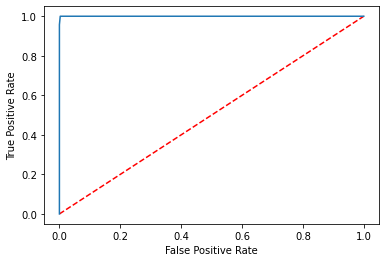

In [125]:

modelSummary = model.stages[-1].summary

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(modelSummary.roc.select('FPR').collect(),
         modelSummary.roc.select('TPR').collect())

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

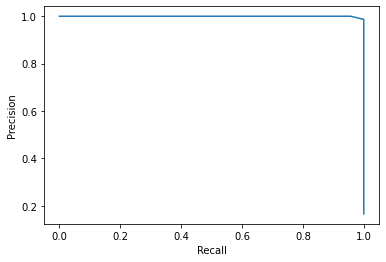

In [126]:
pr = modelSummary.pr.toPandas()

plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
!pip install lckr-jupyterlab-variableinspector